# US Accidents Exploratory Data Analysis

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 

This dataset has been chosen from kaggle and contains about 2.8 million accident records. It can be very useful to understand the accidents where are they prone and work on how to prevent them. 

NOTE- It only contains 49 States, New york not being a part of it

## Uploading the dataset

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepkiratsingh
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 162MB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning

- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.isnull().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

### Importing this library to visualize missing values in a bar chart

In [9]:
import missingno as msno 

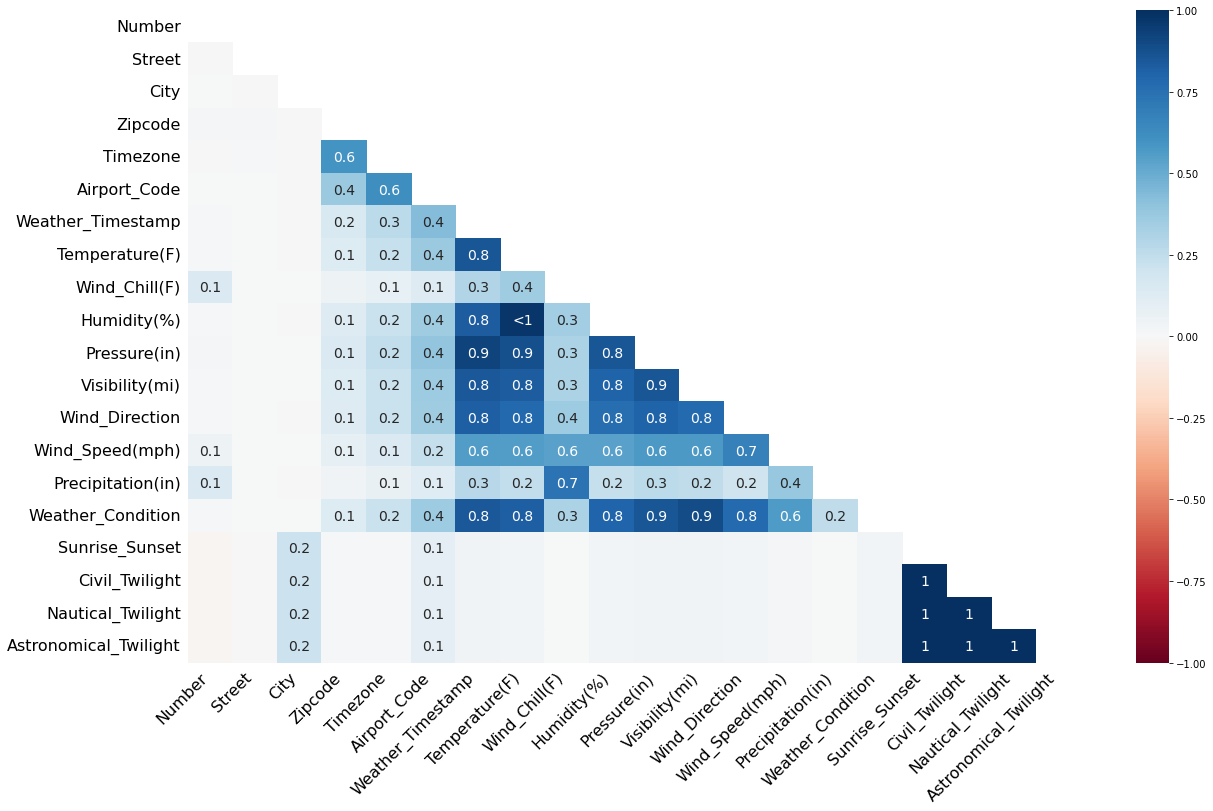

In [10]:
msno.heatmap(df)

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City
2. Start Time
3. Temperature
4. Weather Condition

### City

In [11]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [12]:
cities = df.City.unique()
len(cities)

11682

In [13]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [14]:
cities_by_accident[:15]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Portland        20944
Nashville       20267
Austin          18301
Baton Rouge     18182
Phoenix         17143
Name: City, dtype: int64

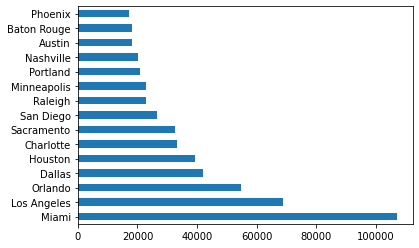

In [15]:
cities_by_accident[:15].plot(kind='barh')

In [16]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident <= 1000]

In [17]:
len(high_accident_cities)

496

In [18]:
len(high_accident_cities) / len(cities)

0.04245848313644924

In [19]:
cities_by_accident.sort_values(ascending = True)[:1110]

American Fork-Pleasant Grove    1
Elida                           1
Township 9                      1
De Graff                        1
Mound Bayou                     1
                               ..
Eastchester                     1
Gerlach                         1
Inchelium                       1
Cedar                           1
Ponca                           1
Name: City, Length: 1110, dtype: int64

### Start Time

In [20]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [21]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [22]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [23]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

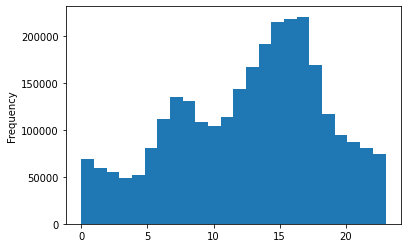

In [24]:
df.Start_Time.dt.hour.plot(kind='hist', bins=24)

In [25]:
df.Start_Time.dt.hour.mode()

0    17
dtype: int64

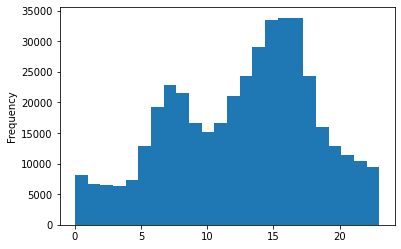

In [26]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
monday_start_time.dt.hour.plot(kind = 'hist', bins=24)

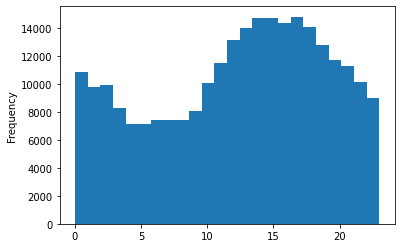

In [27]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sunday_start_time.dt.hour.plot(kind = 'hist', bins=24)

### Start Latitude & Longitude

In [28]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [29]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [30]:
sample_df = df.sample(int(0.1 * len(df)))

In [33]:
import matplotlib

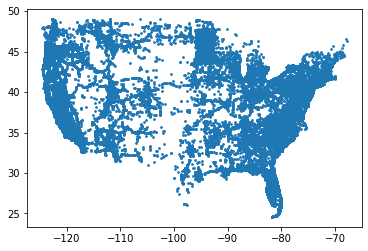

In [39]:
matplotlib.pyplot.scatter(x=sample_df.Start_Lng, y=sample_df.Start_Lat, s=3)

In [41]:
import folium
from folium.plugins import HeatMap

In [42]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [43]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Weather

In [44]:
df.Weather_Condition

0             Light Rain
1             Light Rain
2               Overcast
3               Overcast
4             Light Rain
               ...      
2845337             Fair
2845338             Fair
2845339    Partly Cloudy
2845340             Fair
2845341             Fair
Name: Weather_Condition, Length: 2845342, dtype: object

In [47]:
Common_weather = df.Weather_Condition.value_counts()
Common_weather

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

In [48]:
Common_weather[:15]

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Haze                  36354
Rain                  31044
Fair / Windy          15195
Heavy Rain            11824
Smoke                  7200
Name: Weather_Condition, dtype: int64

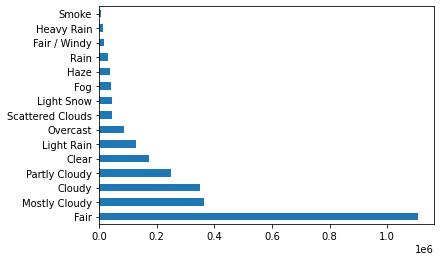

In [49]:
Common_weather[:15].plot(kind='barh')

## Summary and Conclusion


Insights:
- 496 cities (less than 4%) have more than 1000 yearly accidents.
- There were 1110 cities with only 1 accident over the period of February 2016 to Dec 2021
- Most accidents happen in the time frame of from 1 pm to 5 pm with the highest number of accidents happening around 5 pm
- Looking at the graphs of monday and sunday we can see that most accidents occur the times when people generally commute to work whereas on sunday it's spread all over forming a bell curve
- Most accidents happen on the coastal regions with bigger cities
- The most number of accidents were on a fair weather condition which is intresting